In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import scipy.stats as stats
from statsmodels.stats import multitest
import copy

import sys
sys.path.insert(1, "../code/utils")
sys.path.insert(1, "../code/data_modification")
from celldata import *
from effects import *

In [2]:
pathIN = "../data/modified_data/"
filenames = [line.split('\n')[0] for line in open(pathIN + "filenames.txt")][:6]
for i in  range(len(filenames)):print(filenames[i])

MOD_cellshilicnegGFstatus.csv
MOD_cellshilicposGFstatus.csv
MOD_cellslipidnegGFstatus.csv
MOD_cellslipidposGFstatus.csv
MOD_cellsRPnegGFstatus.csv
MOD_cellsRPposGFstatus.csv


In [3]:
np.random.seed(0)
fnum=0
fname = filenames[fnum]
data = pd.read_csv(pathIN + fname, sep=";")
area = data.iloc[:, :40].to_numpy()
gaps = data.iloc[:, 40:].to_numpy()
data.head()

,aSYN1,aSYN2,aSYN3,aSYN4,aSYN5,aSYN6,aSYN7,aSYN8,aSYN9,aSYN10,...,gap_UT31,gap_UT32,gap_UT33,gap_UT34,gap_UT35,gap_UT36,gap_UT37,gap_UT38,gap_UT39,gap_UT40
0,15.254606,18.360318,15.400567,14.420070,16.597102,14.703329,15.227908,16.818747,13.928701,17.152922,...,128,128,128,128,128,0,128,128,128,128
1,22.410364,22.464977,21.081368,21.055675,21.473328,21.336169,21.284119,21.744014,21.011141,20.922923,...,0,0,0,0,0,0,0,0,0,0
2,16.895349,17.080227,16.233804,17.205554,15.819328,15.812081,16.559403,14.389293,16.351019,17.418719,...,128,128,128,128,128,128,128,128,128,128
3,24.332250,24.523963,23.517750,23.634971,23.420254,23.471751,23.529701,23.729067,23.249283,23.353825,...,0,0,0,0,0,0,0,0,0,0
4,25.934287,26.209291,24.447014,24.309717,24.918978,24.828963,24.601156,25.266577,24.379291,24.352791,...,0,0,0,0,0,0,0,0,0,0


In [96]:
area_pairwise = compile_pairwise_comparisons_legacy(area)
gaps_pairwise = compile_pairwise_comparisons_legacy(gaps)

In [104]:
vars1 = np.std(area_pairwise[:,:10], axis=1)
vars2 = np.std(area_pairwise[:,10:], axis=1)

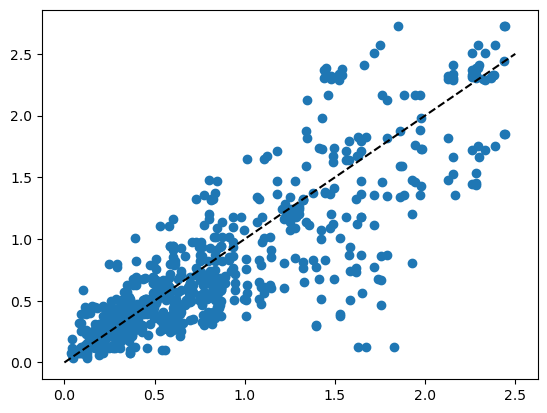

In [108]:
plt.plot(vars1, vars2, 'o')
plt.plot([0, 2.5], [0, 2.5], 'k--')

In [112]:
np.maximum(np.mean(vars1/vars2), np.mean(vars2/vars1))

1.2291268097534815

In [113]:
np.var(vars1/vars2), np.var(vars2/vars1)

(0.9830484444420833, 0.2838433495542519)

In [5]:
area.shape

(131, 40)

In [6]:
result = stats.ttest_ind(area_pairwise[:,:10], area_pairwise[:,10:], axis=1, equal_var=False)

In [7]:
multitest.multipletests(result.pvalue, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)[0].sum()

0

In [88]:
mask = generate_random_effect_maskV2(area.shape[0], 30, [1], lambda: 1 if np.random.rand() < 0.5 else -1)
area_with_effects = insert_model_shifts_legacy(area, mask, lambda:np.random.normal(1.5, 0.2))
gap_with_effects = insert_fisher_effects_legacy(gaps, mask)

In [89]:
compile_pairwise_effect_indicators(mask).sum()

30

In [90]:
area_pairwise_with_effects = compile_pairwise_comparisons_legacy(area_with_effects)
gaps_pairwise_with_effects = compile_pairwise_comparisons_legacy(gap_with_effects)

In [91]:
_,c1,c2=reliability(gaps_pairwise_with_effects[:,:10], gaps_pairwise_with_effects[:,10:])

In [92]:
mask[:5,:]

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0., -1.,  0.,  0.],
       [ 0., -1.,  0.,  0.]])

In [93]:
np.logical_or(np.logical_and(c1>=9, c2<=1), np.logical_and(c1<=1, c2>=9)).sum()

12

In [94]:
result = stats.ttest_ind(area_pairwise_with_effects[:,:10], area_pairwise_with_effects[:,10:], axis=1, equal_var=False)

In [95]:
multitest.multipletests(result.pvalue, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)[0].sum()

16